**Problem statement
Create a machine learning model that will help the company in determining the salary of newly hired employees using the given data.**

**Approach**
Steps:
        •	Step 1: Data understanding , exploration and Importing Data
        
        •	Step 2: Data cleaning (handling nulls and outliers)
        
        •	Step 3: Pre-processing (Convert categorical columns, Dummy variables)
        
        •	Step 4: Data preprocessing (scaling, defining X&Y, Train_Test Split)
        
        •	Step 5: Model training (Regression)
        
        •	Step 6: Compare regression models (R2 values)
        
        •	Step 7: Final model selection and optimization

In [9]:
import numpy as ns
import pandas as pd
import seaborn as sns

In [472]:
#STEP 1 :Importing excel file
df=pd.read_excel('C:/Users/ROHIT/Project.xlsx', header=0)

In [35]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City type,College type
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Non-metro,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Non-metro,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Non-metro,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Non-metro,Tier 3
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Non-metro,Tier 1


In [43]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   City type            1589 non-null   object 
 9   College type         1589 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 124.3+ KB


**STEP 2:Data Cleaning and Preparing**

In [474]:
#checking for null values
print(df.isnull().sum())

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
City type              0
College type           0
dtype: int64


In [13]:
#Dummy variable creation
df= pd.get_dummies(df, columns=['Role'], drop_first=True)

In [22]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City type,College type,Role_Manager
0,SVNIT Surat,Asansol,55523,3,66,19,71406.58,Non-metro,Tier 2,True
1,NIT Bhopal,Ajmer,57081,1,84,18,68005.87,Non-metro,Tier 2,False
2,"IEM, Kolkata",Rajpur Sonarpur,60347,2,52,28,76764.02,Non-metro,Tier 3,False
3,"KIIT, Bhubaneswar",Ajmer,49010,2,81,33,82092.39,Non-metro,Tier 3,False
4,DTU,Durgapur,57879,4,74,32,73878.10,Non-metro,Tier 1,False


Converting Categorical variables into numerical

In [15]:
df['Role_Manager'] = df['Role_Manager'].astype(int)

In [17]:
city_map = {'Metro': 1, 'Non-metro': 0}
df['City type'] = df['City type'].map(city_map)

In [19]:
college_map = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
df['College type'] = df['College type'].map(college_map)

In [49]:
df.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City type,College type,Role_Manager
0,SVNIT Surat,Asansol,55523,3,66,19,71406.58,0,2,1
1,NIT Bhopal,Ajmer,57081,1,84,18,68005.87,0,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347,2,52,28,76764.02,0,3,0
3,"KIIT, Bhubaneswar",Ajmer,49010,2,81,33,82092.39,0,3,0
4,DTU,Durgapur,57879,4,74,32,73878.10,0,1,0
5,IIIT Delhi,Kolhapur,54340,4,73,31,59950.89,0,2,0
6,"BMS College, Bangalore",Surat,60298,1,42,46,66602.34,1,3,0
7,LNMIIT,Delhi,49944,2,56,37,57768.44,1,2,0
8,"Dayanand College of Engineering, Bangalore",Chennai,53124,4,40,37,70083.30,1,3,0
9,NIT Tiruchipally (Trichy),Kolhapur,51141,1,47,60,85648.48,0,1,0


Using Boxplot,Scatterplot, Jointplot to check for Outliers

<Axes: >

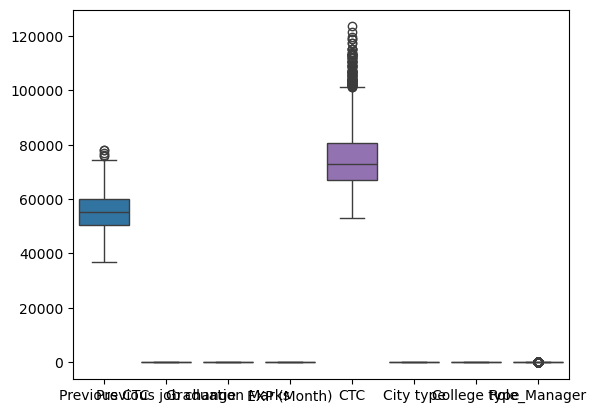

In [30]:
sns.boxplot(data=df)

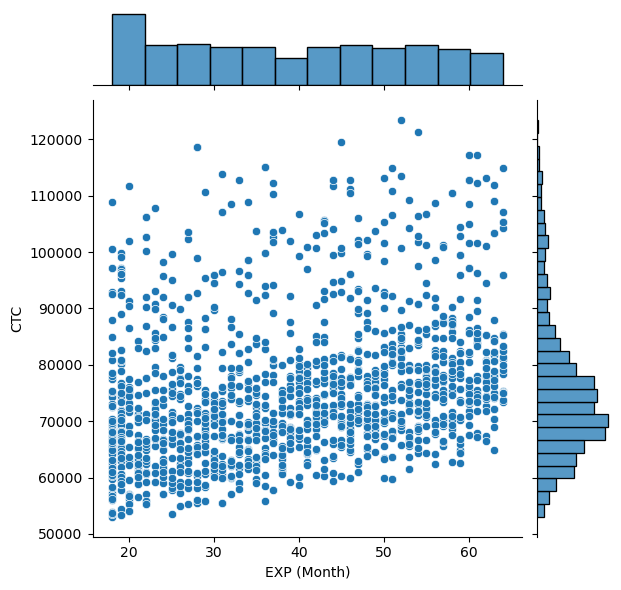

In [32]:
sns.jointplot(x="EXP (Month)",y="CTC", data=df)

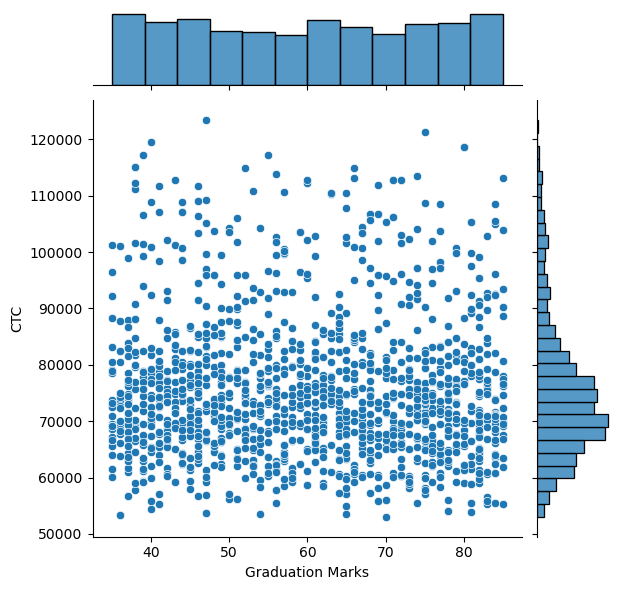

In [34]:
sns.jointplot(x="Graduation Marks",y="CTC", data=df)

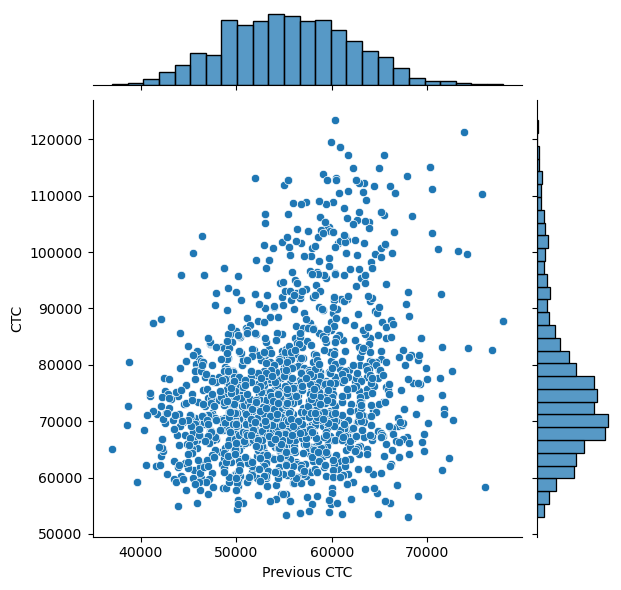

In [36]:
 sns.jointplot(x="Previous CTC",y="CTC", data=df)

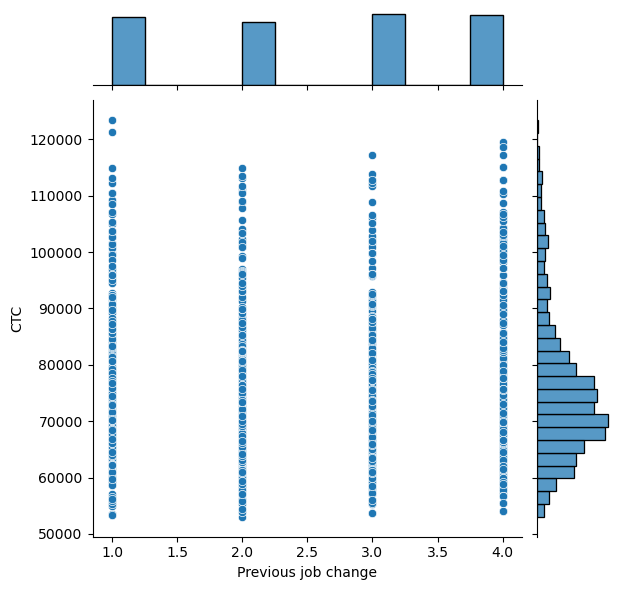

In [38]:
sns.jointplot(x="Previous job change",y="CTC", data=df)

<Axes: xlabel='Previous job change', ylabel='count'>

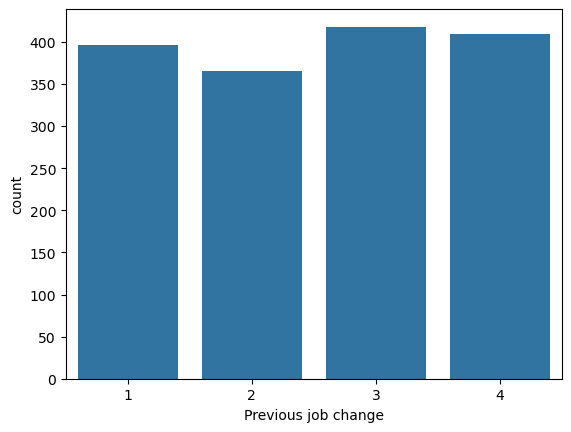

In [40]:
sns.countplot(x="Previous job change", data=df)

<Axes: xlabel='EXP (Month)', ylabel='CTC'>

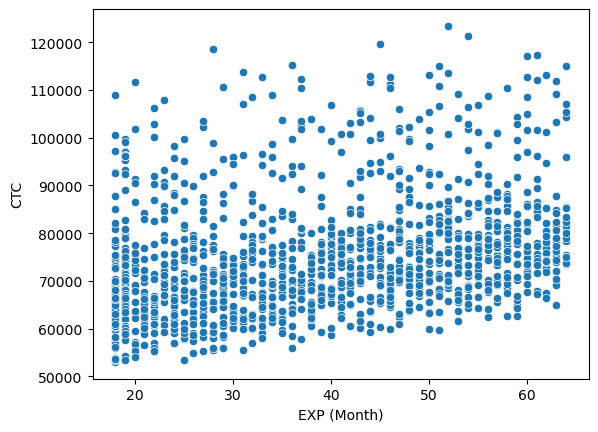

In [42]:
 sns.scatterplot(x=df['EXP (Month)'], y=df['CTC'])

<Axes: xlabel='Previous CTC', ylabel='CTC'>

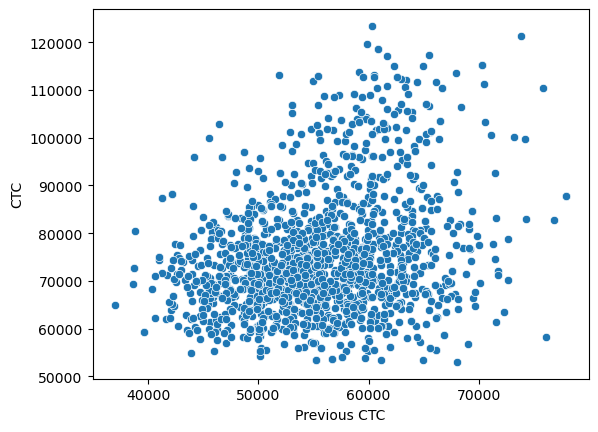

In [44]:
 sns.scatterplot(x=df['Previous CTC'], y=df['CTC'])

<Axes: xlabel='Graduation Marks', ylabel='CTC'>

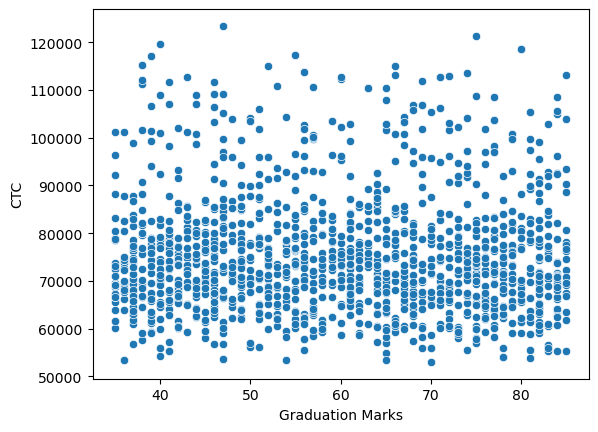

In [46]:
 sns.scatterplot(x=df['Graduation Marks'], y=df['CTC'])

<Axes: xlabel='Graduation Marks', ylabel='Count'>

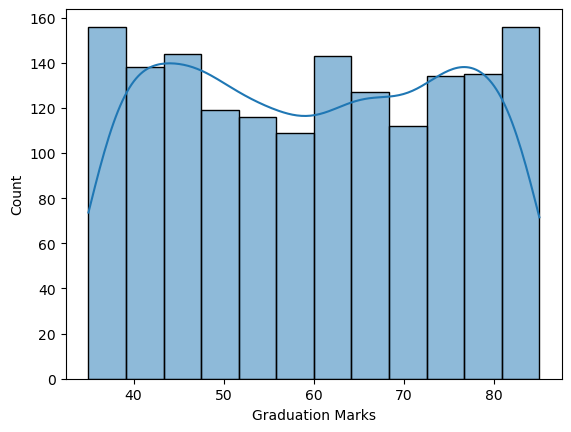

In [48]:
sns.histplot(df['Graduation Marks'], kde=True)

<Axes: xlabel='Previous CTC', ylabel='Count'>

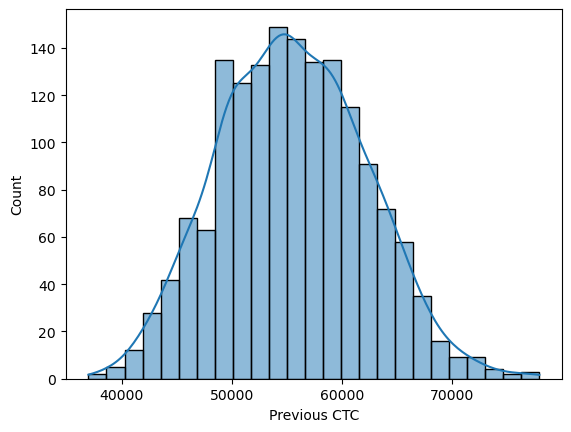

In [50]:
sns.histplot(df['Previous CTC'], kde=True)

<Axes: xlabel='Graduation Marks', ylabel='Count'>

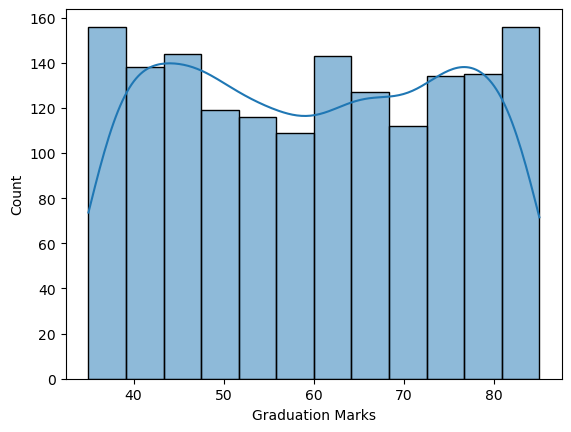

In [52]:
 sns.histplot(df['Graduation Marks'], kde=True)

 Handeling Outliers using Percentile Capping 

In [21]:
ns.percentile(df['Graduation Marks'],[99])[0] 

85.0

In [23]:
uv=ns.percentile(df['Graduation Marks'],[99])[0]

In [25]:
df.loc[df['Graduation Marks'] > 3 * uv, 'Graduation Marks'] = 3 * uv


In [60]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City type,College type,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,1.975456,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.838330,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,1.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,2.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,3.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,3.000000,1.000000


In [27]:
ns.percentile(df['Previous CTC'],[99])[0]

71506.92

In [29]:
vv=ns.percentile(df['Previous CTC'],[99])[0]

In [31]:
df.loc[df['Previous CTC'] > 3 * vv, 'Previous CTC'] = 3 * vv


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_16968\2968687019.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '214520.76' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Previous CTC'] > 3 * vv, 'Previous CTC'] = 3 * vv


In [33]:
ns.percentile(df['EXP (Month)'],[99])[0]

64.0

In [35]:
uu=ns.percentile(df['EXP (Month)'],[99])[0]

In [37]:
df.loc[df['EXP (Month)'] > 3 * uu, 'EXP (Month)'] = 3 * uu

In [103]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City type,College type,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,1.975456,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.838330,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,1.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,2.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,3.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,3.000000,1.000000


**Data Processing**

**STEP 4:Seperating variables (X & Y Values)**

In [39]:
import statsmodels.api as sm

In [41]:
X = df.drop(['CTC', 'City', 'College'], axis=1)

In [78]:
X.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),City type,College type,Role_Manager
0,55523.0,3,66,19,0,2,1
1,57081.0,1,84,18,0,2,0
2,60347.0,2,52,28,0,3,0
3,49010.0,2,81,33,0,3,0
4,57879.0,4,74,32,0,1,0


In [43]:
Y=df['CTC']

In [82]:
Y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

***STEP 5:Fitting Regression Models***

Linear Regression model 

In [488]:
#statsmodel
X_con=sm.add_constant(X)

In [47]:
lm =sm.OLS(Y, X_con).fit()

In [88]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 12 May 2025   Prob (F-statistic):          4.70e-257
Time:                        13:49:35   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
City type             380.8308    433.455      0.879      0.380    -469.377    1231.039
College type         -481.5147    258.382     -1.864      0.063    -988.321      25.292
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Summery shows (by 'p-value' and 'B1' values)
1)Variables like Previous **CTC,EXP (Month),College type and Role** is are Directly affecting CTC.

In [49]:
from sklearn.linear_model import LinearRegression

In [51]:
lm2= LinearRegression()

In [53]:
lm2.fit(X,Y)

LinearRegression()

In [55]:
print(lm2.intercept_,lm2.coef_)

38421.10980674037 [ 4.10090279e-01  1.26565295e+02  6.23621203e+00  2.61344394e+02
  3.80830787e+02 -4.81514705e+02  1.94874279e+04]


**Train-Test Split**

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state=0)

In [63]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [65]:
#SKlearn
from sklearn.linear_model import LinearRegression

In [67]:
lm_a = LinearRegression()

In [69]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [71]:
print(X_train.isnull().sum()) 

Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
City type              0
College type           0
Role_Manager           0
dtype: int64


**Predict**

In [73]:
y_test_a=lm_a.predict(X_test)


In [75]:
y_train_a=lm_a.predict(X_train)

**R2 value**

In [77]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_test,y_test_a)

0.5355989894789344

In [81]:
r2_score(y_train,y_train_a)

0.5331293335456955

**Ridge Model**

In [83]:
#standardization
from sklearn import preprocessing

In [85]:
scaler=preprocessing.StandardScaler().fit(X_train)

In [87]:
X_train_s=scaler.transform(X_train)

In [89]:
X_test_s=scaler.transform(X_test)

**Ridge**

In [91]:
from sklearn.linear_model import Ridge

In [93]:
lm_r=Ridge(alpha=1.0)
lm_r.fit(X_train_s,y_train)

Ridge()

In [95]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5355706435154037

Using validation curve to select optimum from hyperparameters


In [97]:
from sklearn.model_selection import validation_curve

In [99]:
param_range=ns.logspace(-2,8,100)

In [101]:
validation_curve

<function sklearn.model_selection._validation.validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)>

In [103]:
train_scores,test_scores = validation_curve(Ridge(),X_train_s,y_train,param_name="alpha",
    param_range=param_range,scoring='r2')

In [ ]:
print(train_scores)
print(test_scores)

In [105]:
train_mean=ns.mean(train_scores,axis=1)

In [107]:
test_mean=ns.mean(test_scores,axis=1)

In [109]:
train_mean

array([5.33584198e-01, 5.33584198e-01, 5.33584198e-01, 5.33584198e-01,
       5.33584198e-01, 5.33584198e-01, 5.33584197e-01, 5.33584197e-01,
       5.33584196e-01, 5.33584195e-01, 5.33584193e-01, 5.33584190e-01,
       5.33584185e-01, 5.33584178e-01, 5.33584165e-01, 5.33584146e-01,
       5.33584115e-01, 5.33584066e-01, 5.33583988e-01, 5.33583864e-01,
       5.33583666e-01, 5.33583351e-01, 5.33582850e-01, 5.33582053e-01,
       5.33580786e-01, 5.33578772e-01, 5.33575572e-01, 5.33570492e-01,
       5.33562433e-01, 5.33549660e-01, 5.33529437e-01, 5.33497470e-01,
       5.33447031e-01, 5.33367635e-01, 5.33243023e-01, 5.33048161e-01,
       5.32744836e-01, 5.32275351e-01, 5.31553770e-01, 5.30454272e-01,
       5.28796554e-01, 5.26329100e-01, 5.22712731e-01, 5.17509194e-01,
       5.10182354e-01, 5.00121639e-01, 4.86696824e-01, 4.69347565e-01,
       4.47699366e-01, 4.21682378e-01, 3.91617638e-01, 3.58236040e-01,
       3.22612701e-01, 2.86027917e-01, 2.49791646e-01, 2.15078350e-01,
      

In [111]:
max(test_mean)

0.5258291929838951

In [113]:
ns.where(test_mean==max(test_mean))

(array([26], dtype=int64),)

In [115]:
#lamda value at which we are getting the max R2 value
param_range[26]

4.229242874389499

In [117]:
lm_r_best=Ridge(alpha=param_range[26])

In [119]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=4.229242874389499)

In [202]:
r2_score(y_test,lm_r_best.predict(X_test_s))

0.535475412672408

In [204]:
r2_score(y_train,lm_r_best.predict(X_train_s))

0.5331238227310131

**Lasso**

In [552]:
from sklearn.linear_model import Lasso

In [554]:
lasso = Lasso(random_state=42, max_iter=10000)

In [556]:
param_grid14 = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10] 
}

In [558]:
grid_search_lasso = GridSearchCV(estimator=lasso,
                                 param_grid=param_grid14,
                                 scoring='r2',
                                 cv=5,
                                 n_jobs=-1)

In [560]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [562]:
grid_search_lasso.best_params_

{'alpha': 10}

In [564]:
grid_search_lasso.best_score_

0.5258250331573182

In [566]:
#R2_score method
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [568]:
r2_lasso

0.535715589695876

**Decision Tree**

In [121]:
#training regression tree
from sklearn import tree

In [123]:
regtree = tree.DecisionTreeRegressor(max_depth= 3)

In [125]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [127]:
#Predicting values
y_train_pred=regtree.predict(X_train)
y_test_pred=regtree.predict(X_test)

In [129]:
#MOdel performance
from sklearn.metrics import mean_squared_error,r2_score

In [131]:
mean_squared_error(y_test,y_test_pred)

60424631.026134804

In [133]:
r2_score(y_train,y_train_pred)

0.6137194061789908

In [135]:
r2_score(y_test,y_test_pred)

0.5927831611924907

**Decision tree: Plotting**

In [137]:
dot_data=tree.export_graphviz(regtree,out_file=None)

In [139]:
 from IPython.display import Image

In [145]:
from sklearn.tree import export_graphviz

In [141]:
import pydotplus

In [149]:
graph = pydotplus.graph_from_dot_data(dot_data)

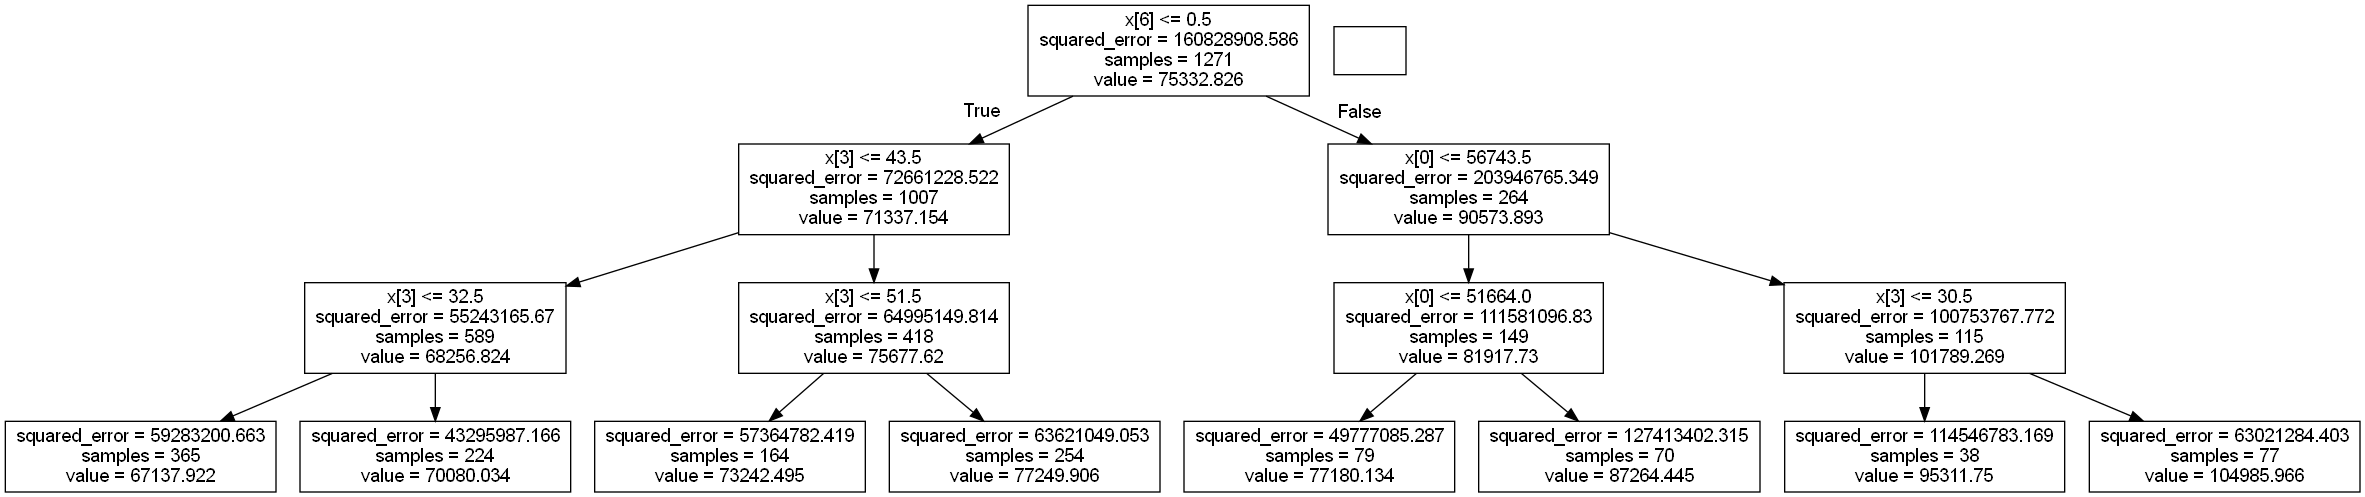

In [153]:
Image(graph.create_png())

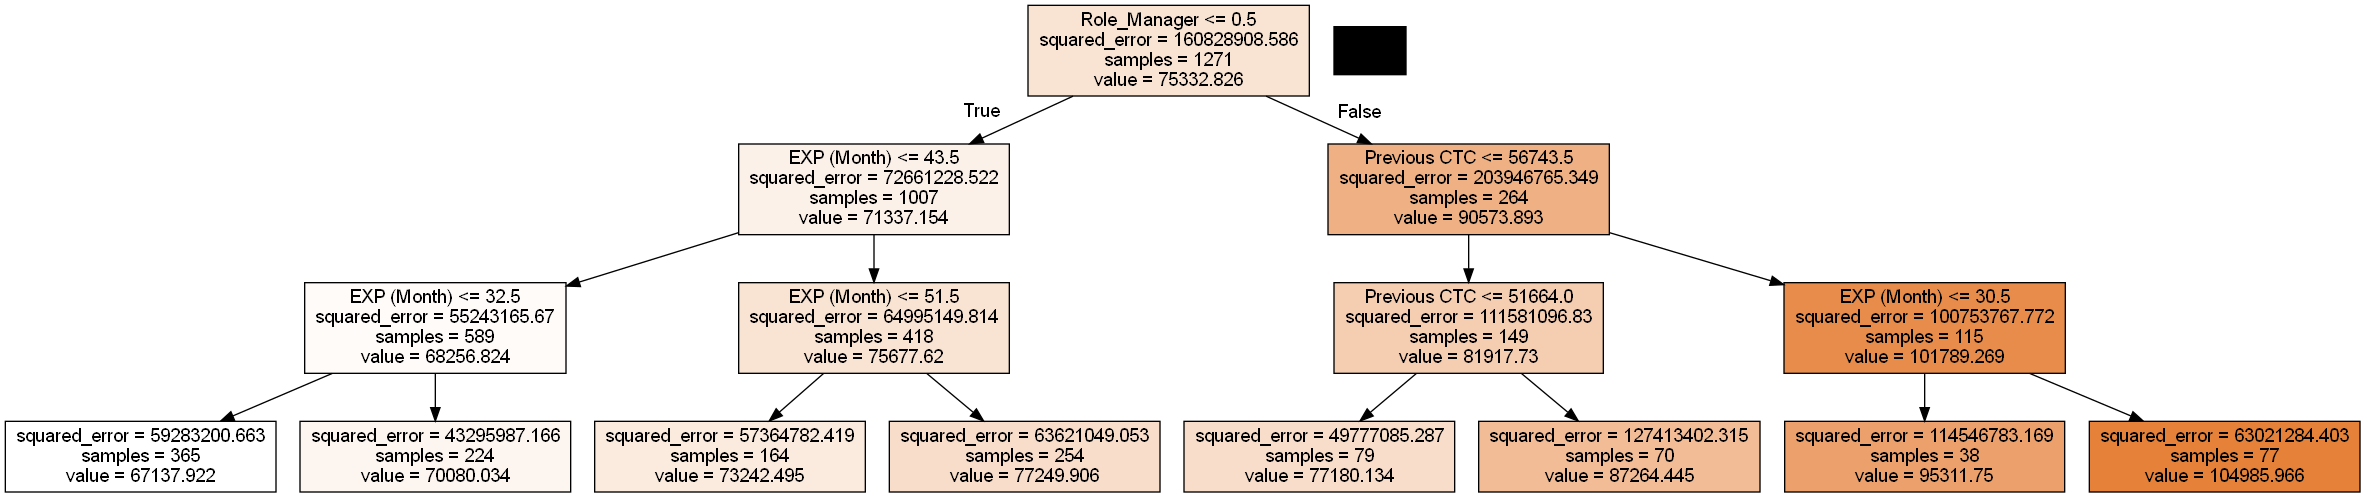

In [165]:
#pruning
#Controlling tree growth
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train, y_train)
dot_data= tree.export_graphviz (regtree1, out_file= None, feature_names= X_train.columns, filled =True)
graph1 =pydotplus.graph_from_dot_data(dot_data)
Image (graph1.create_png())

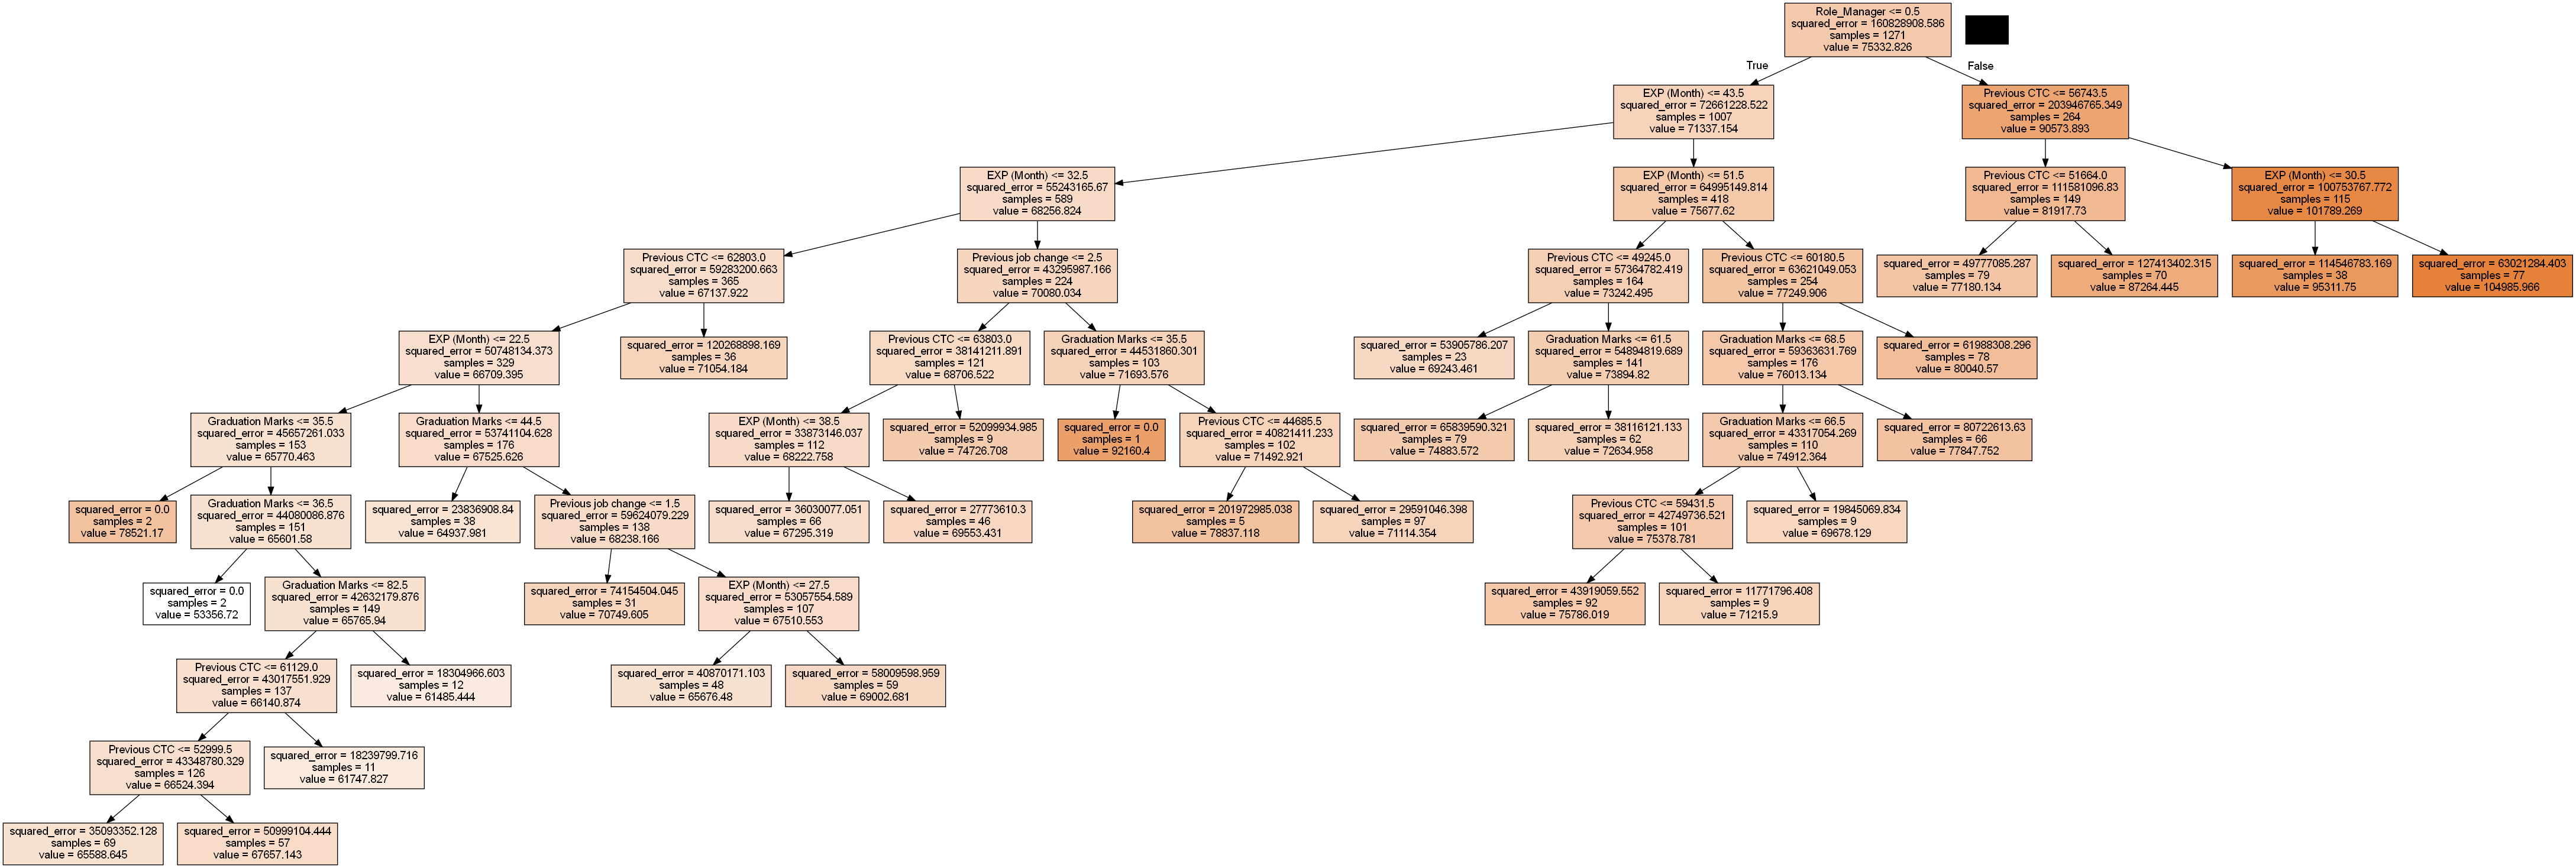

In [171]:
regtree1 = tree.DecisionTreeRegressor(min_samples_split = 100)
regtree1.fit(X_train, y_train)
dot_data= tree.export_graphviz (regtree1, out_file= None, feature_names= X_train.columns, filled =True)
graph1 =pydotplus.graph_from_dot_data(dot_data)
Image (graph1.create_png())

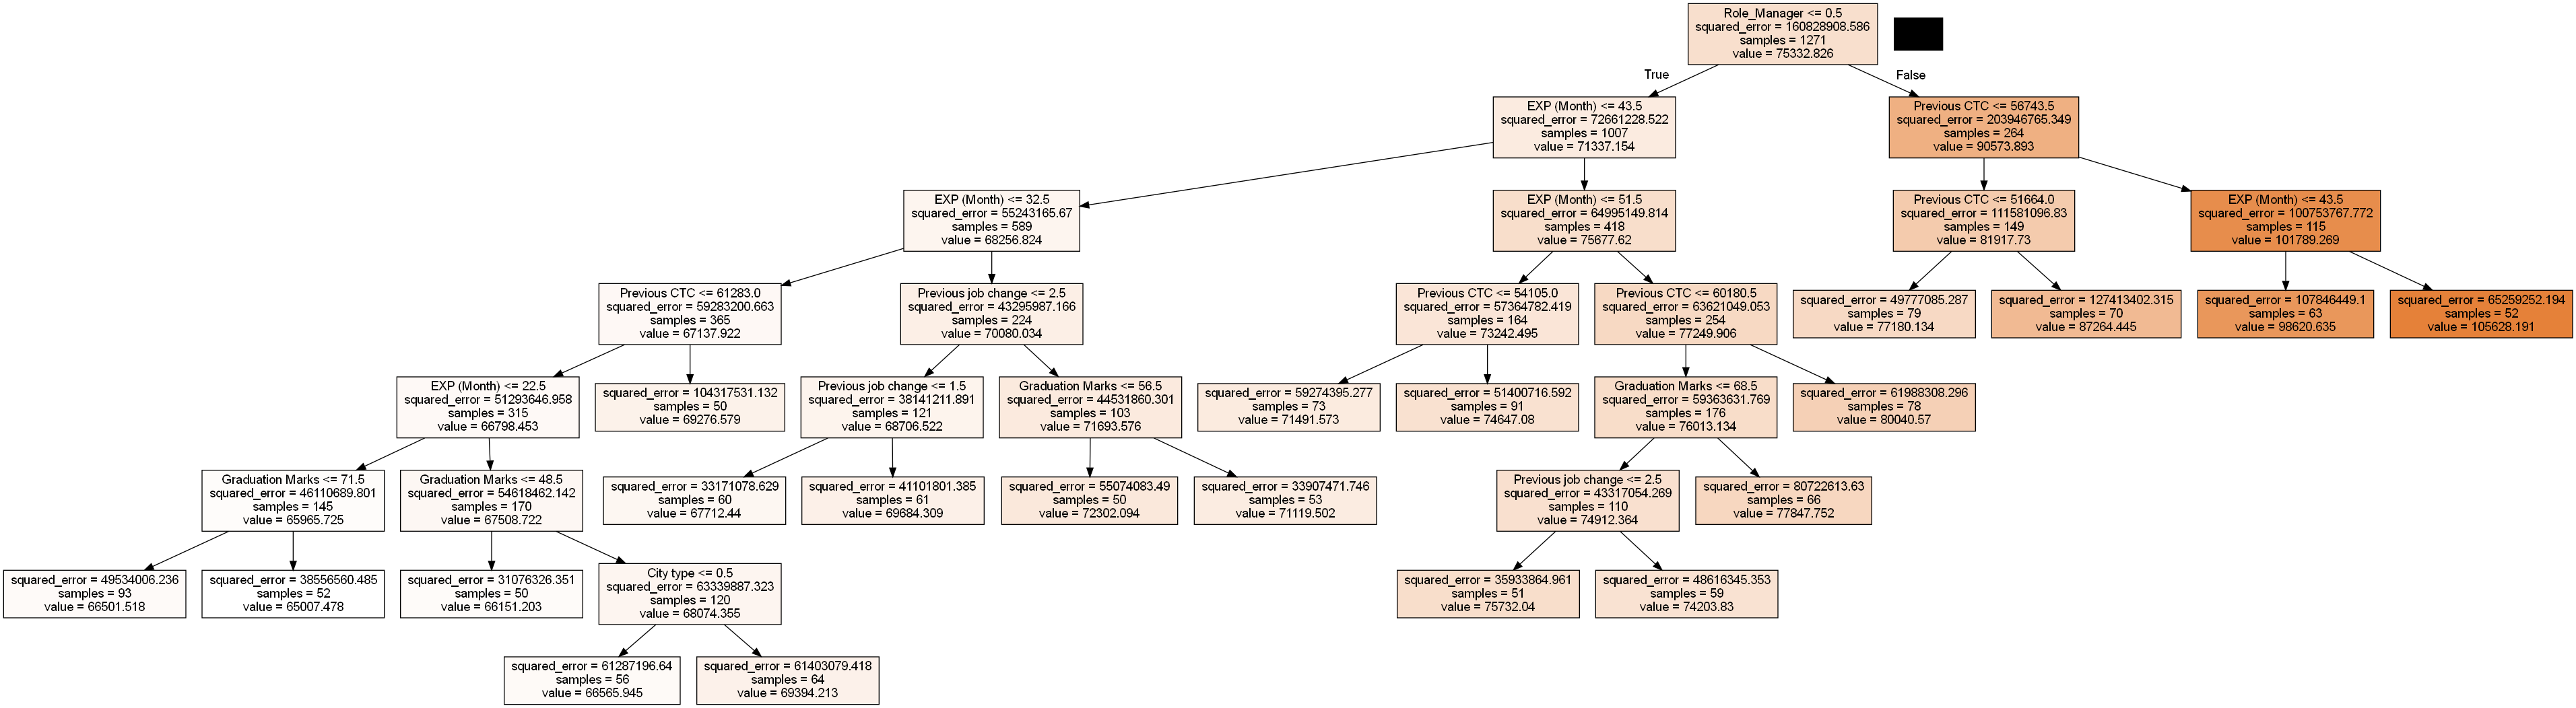

In [175]:
regtree1 = tree.DecisionTreeRegressor(min_samples_leaf = 50)
regtree1.fit(X_train, y_train)
dot_data= tree.export_graphviz (regtree1, out_file= None, feature_names= X_train.columns, filled =True)
graph1 =pydotplus.graph_from_dot_data(dot_data)
Image (graph1.create_png())

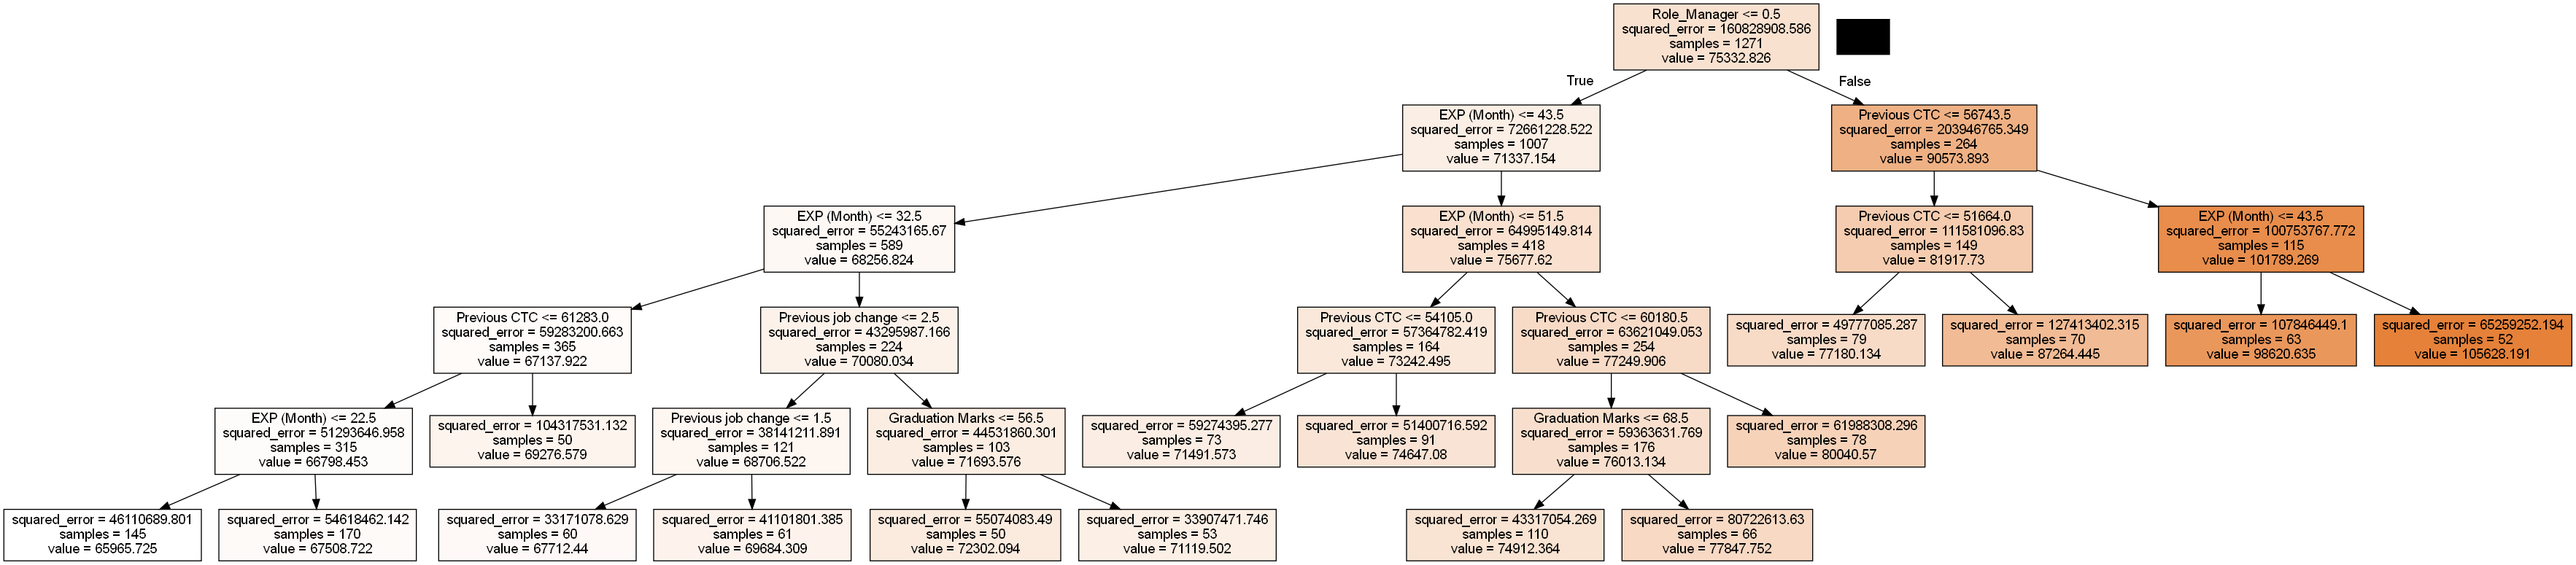

In [179]:
regtree1 = tree.DecisionTreeRegressor(min_samples_leaf = 50,min_samples_split = 100,max_depth = 5)
regtree1.fit(X_train, y_train)
dot_data= tree.export_graphviz (regtree1, out_file= None, feature_names= X_train.columns, filled =True)
graph1 =pydotplus.graph_from_dot_data(dot_data)
Image (graph1.create_png())

#Optimal tree growth

In [191]:
for depth in range(2, 10):
    model = tree.DecisionTreeRegressor(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)
    print(f"Max Depth: {depth}, R2 Score: {r2_score(y_test, y_pred1)}")

Max Depth: 2, R2 Score: 0.5476867761055589
Max Depth: 3, R2 Score: 0.5927831611924912
Max Depth: 4, R2 Score: 0.603220439065417
Max Depth: 5, R2 Score: 0.5592769402126234
Max Depth: 6, R2 Score: 0.5506482957926988
Max Depth: 7, R2 Score: 0.5273116743013858
Max Depth: 8, R2 Score: 0.5002485449111381
Max Depth: 9, R2 Score: 0.49355788554460234


In [203]:
for min_split in range(2, 20):
    model = tree.DecisionTreeRegressor(min_samples_split=min_split, random_state=0)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    print(f"Min Samples Split: {min_split}, R2 Score: {r2_score(y_test, y_pred2)}")

Min Samples Split: 2, R2 Score: 0.3735041023140022
Min Samples Split: 3, R2 Score: 0.37031850299818014
Min Samples Split: 4, R2 Score: 0.3602018539438082
Min Samples Split: 5, R2 Score: 0.3634883933328603
Min Samples Split: 6, R2 Score: 0.40407632939863714
Min Samples Split: 7, R2 Score: 0.40590977984876286
Min Samples Split: 8, R2 Score: 0.4096808758127227
Min Samples Split: 9, R2 Score: 0.41509414053244964
Min Samples Split: 10, R2 Score: 0.4667744642999041
Min Samples Split: 11, R2 Score: 0.47590500269344704
Min Samples Split: 12, R2 Score: 0.46111789824319216
Min Samples Split: 13, R2 Score: 0.4953594312088382
Min Samples Split: 14, R2 Score: 0.47843460700136453
Min Samples Split: 15, R2 Score: 0.47569067931060616
Min Samples Split: 16, R2 Score: 0.4817179459850147
Min Samples Split: 17, R2 Score: 0.4892048560604664
Min Samples Split: 18, R2 Score: 0.5051082507377124
Min Samples Split: 19, R2 Score: 0.5043427499627793


In [207]:
for min_leaf in range(1, 20):
    model = tree.DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=0)
    model.fit(X_train, y_train)
    y_pred3 = model.predict(X_test)
    print(f"Min Samples Leaf: {min_leaf}, R2 Score: {r2_score(y_test, y_pred3)}")

Min Samples Leaf: 1, R2 Score: 0.3735041023140022
Min Samples Leaf: 2, R2 Score: 0.41392003726228943
Min Samples Leaf: 3, R2 Score: 0.44934262411858283
Min Samples Leaf: 4, R2 Score: 0.4843071422588383
Min Samples Leaf: 5, R2 Score: 0.5343269891398581
Min Samples Leaf: 6, R2 Score: 0.5394687487077873
Min Samples Leaf: 7, R2 Score: 0.5288908796125213
Min Samples Leaf: 8, R2 Score: 0.5219196744886774
Min Samples Leaf: 9, R2 Score: 0.5198964864025917
Min Samples Leaf: 10, R2 Score: 0.5484343658369115
Min Samples Leaf: 11, R2 Score: 0.5345123472734477
Min Samples Leaf: 12, R2 Score: 0.5193299266152341
Min Samples Leaf: 13, R2 Score: 0.5367143422486602
Min Samples Leaf: 14, R2 Score: 0.5427609145116767
Min Samples Leaf: 15, R2 Score: 0.5452258663942094
Min Samples Leaf: 16, R2 Score: 0.5484493535339885
Min Samples Leaf: 17, R2 Score: 0.5565115270260259
Min Samples Leaf: 18, R2 Score: 0.570690121100774
Min Samples Leaf: 19, R2 Score: 0.5603424919855269


#Optimum values

max_depth=4; min_samples_split=18; min_samples_leaf=18

**Final**

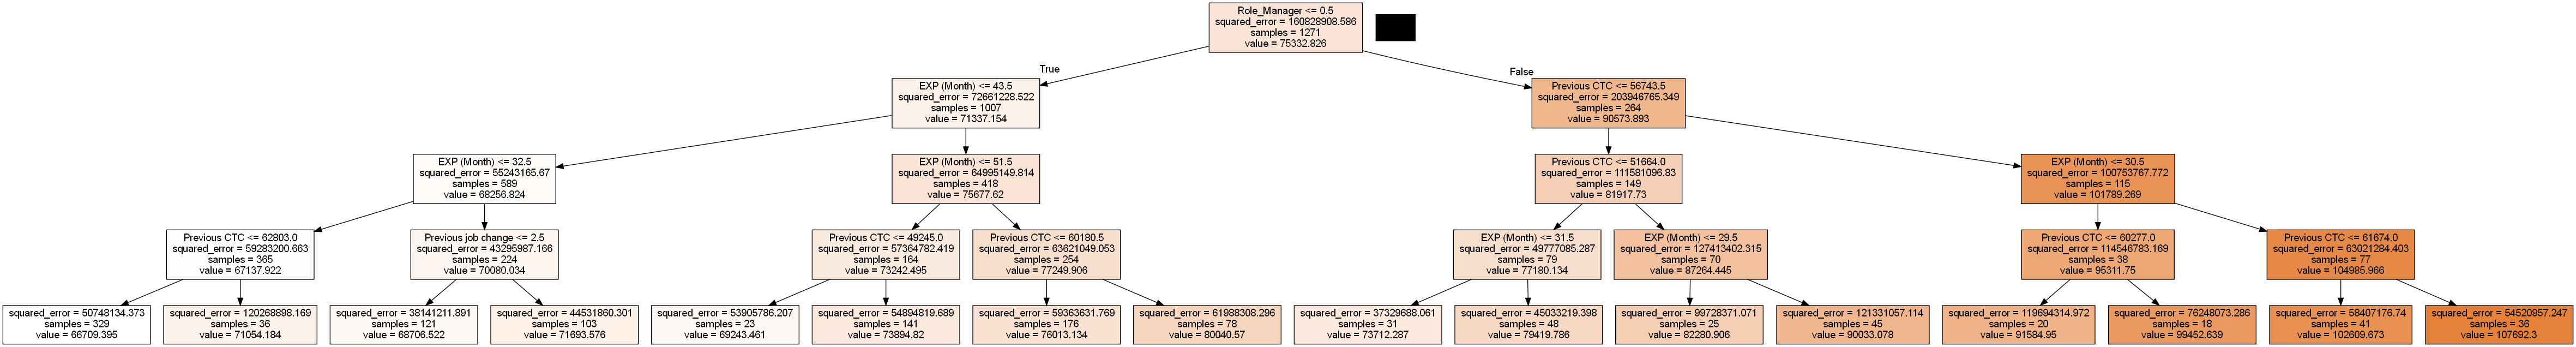

In [465]:
regtree1 = tree.DecisionTreeRegressor(min_samples_leaf = 18,min_samples_split = 18,max_depth = 4)
regtree1.fit(X_train, y_train)
dot_data= tree.export_graphviz (regtree1, out_file= None, feature_names= X_train.columns, filled =True)
graph1 =pydotplus.graph_from_dot_data(dot_data)
Image (graph1.create_png())

In [467]:
regtree1.fit(X_train, y_train)
y_pred = regtree1.predict(X_test)
r2_tree=r2_score(y_test, y_pred)

In [469]:
r2_tree

0.5912942136438282

**Random Forest(Ensemble method)**

In [225]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [247]:
rf = RandomForestRegressor(n_estimators=1000,n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [249]:
y_pred0 = rf.predict(X_test)

In [251]:
r2_score(y_test, y_pred0)

0.6609499758769295

In [245]:
mean_squared_error(y_test, y_pred0)

51479064.600243874

In [510]:
# optimizing by hyperparameter
from sklearn.model_selection import GridSearchCV

In [512]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(RandomForestRegressor(n_estimators=1000, random_state=42),
                           param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [516]:
#R2
grid_search.best_score_

0.6040308731223685

In [536]:
y_pred12 = grid_search.predict(X_test)

In [538]:
r2_score(y_test, y_pred12)

0.6360345661727307

 Tried hyperparameter tuning 2 times with different parameters, but the performance did not significantly improve.
1.above optimization put restrictions on sample size,depth and sample split caused underfitting
2.Due to (GridSearchCV)cross fitting. 
3.didnt explore better hyperparameters
4.Randomness in the algorithm

In [528]:
param_grid = {
    'max_depth': [10, 20, 30,'None'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt','log2','None']
}

grid_search = GridSearchCV(RandomForestRegressor(n_estimators=1000, random_state=42),
                           param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ROHIT\anaconda3\Lib\site-package

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 'None'],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [530]:
#R2
grid_search.best_score_

0.6093066758465261

In [540]:
y_pred13 = grid_search.predict(X_test)

In [542]:
r2_score(y_test, y_pred13)

0.6360345661727307

**Bagging(Ensemble methode)**

In [267]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [279]:
bg_tree=tree.DecisionTreeRegressor()

In [281]:
bag_reg = BaggingRegressor (estimator=bg_tree, n_estimators=1000,bootstrap=True, random_state=42,
    n_jobs=-1)     

In [283]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [287]:
y_pred_bg = bag_reg.predict(X_test)

In [291]:
r2_bg=r2_score(y_test, y_pred_bg)
r2_bg

0.6597583848142771

In [352]:
param_grid2 = {
    'n_estimators': [100, 300, 500,1000],
    'max_samples': [0.6, 0.8, 1.0], 
    'max_features': [0.6, 0.8, 1.0],  
    'estimator__max_depth': [None, 5, 10],}

In [354]:
grid_search = GridSearchCV(bag_reg,
                           param_grid2, cv=5, scoring='r2', n_jobs=-1)

In [356]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        n_estimators=1000, n_jobs=-1,
                                        random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [None, 5, 10],
                         'max_features': [0.6, 0.8, 1.0],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='r2')

In [358]:
grid_search.best_params_

{'estimator__max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.8,
 'n_estimators': 500}

In [360]:
grid_search.best_score_

0.6153888041153264

In [506]:
#Actual R2
y_pred11 = grid_search.predict(X_test)

In [508]:
r2_score(y_test, y_pred11)

0.6360345661727307

**Boostion**

In [363]:
#Gradient_Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [572]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [574]:
y_pred4 = gbr.predict(X_test)

In [576]:
r2_score(y_test, y_pred4)

0.6121660544994096

In [375]:
mean_squared_error(y_test, y_pred4, squared=False)

C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7586.073543500163

In [578]:
param_grid3 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

In [580]:
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid3,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

In [582]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [584]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [586]:
grid_search.best_score_

0.6072126611936236

In [588]:
best_gbr = grid_search.best_estimator_
y_pred_best = best_gbr.predict(X_test)


In [590]:
 r2_score(y_test, y_pred_best)

0.6121660544994096

**Ada Boosting**

In [404]:
from sklearn.ensemble import AdaBoostRegressor

In [406]:
ab_r = DecisionTreeRegressor(max_depth=3)

In [408]:
ada_reg = AdaBoostRegressor( estimator=ab_r,
                            n_estimators=100,  
                            learning_rate=0.1, 
                            random_state=42)

In [410]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [420]:
y_pred_ada = ada_reg.predict(X_test)
r2_ab = r2_score(y_test, y_pred_ada)

In [422]:
r2_ab

0.5976947416663098

In [424]:
param_grid5 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [2, 3, 5]
}

In [426]:
grid_search = GridSearchCV(
    AdaBoostRegressor(estimator=ab_r, random_state=42),
    param_grid5, cv=3, scoring='r2', n_jobs=-1
)

In [428]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 3, 5],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [430]:
 grid_search.best_params_

{'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 100}

In [432]:
grid_search.best_score_

0.6084701400070357

In [436]:
y_pred_grid = grid_search.predict(X_test)

In [438]:
 r2_score(y_test, y_pred_grid)

0.6175167882510246

**XG Boosting**

In [441]:
from xgboost import XGBRegressor

In [443]:
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [445]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [449]:
y_pred_xgb = xgb_reg.predict(X_test)
r2 = r2_score(y_test, y_pred_xgb)
r2

0.616087070815413

In [451]:
param_grid6 = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

In [453]:
grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid6,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

In [455]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8]},
             scoring='r2')

In [457]:
 grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [459]:
grid_search.best_score_

0.6121777343131877

In [461]:
y_pred_grid_xgb = grid_search.predict(X_test)

In [463]:
r2_score(y_test, y_pred_grid_xgb)

0.616087070815413

**Step 6: Best Model Selection and optimization**

 **Random Forest Model** Performed the best with Highest **R2** value of **0.6609** 
 
 --> Tried hyperparameter tuning 2 times with different parameters, but the performance did not significantly improve.
 
1.above optimization put restrictions on sample size,depth and sample split caused underfitting

2.Due to (GridSearchCV) cross-fitting. 

3.didnt explore better hyperparameters

4.Randomness in the algorithm

# Questions

**1)Your views about the problem statement?**

--> The Company wants us to predict the CTC of new employees which is highly important for them to be able to make future decision. By this model they will be able to identify the variables which are most relevant to CTC . It will also help them to maintain consistency with salaries based on employees qualification and make data driven decision. 


**2)What will be your approach to solving this task?**

-->My Approach:
   1.Understanding data, then importing the data
   
   2.Data Cleaning and processing: dummy variables, conversion of categorical variables, handeling null values
   
   3.Defining X & Y values
   
   4.Model building: build and try all the regression models.
   
   5.Comparing and selecting best model by R2 value.
   
   6.Select best model, analyse it and further optimize it.
   
   
**3)What ML model options did you have available to perform this task?**

--> I tried the following regression models:
    1.	Linear Regression
    2.	Ridge regression
    
    3.	Decision Tree Regressor
    
    4.	Random Forest Regressor
    
    5.	Bagging regressor.
    
    6.	AdaBoost Regressor.
    
    7.	Gradient Boosting Regression
    
    8.	XGBoosting Regression.
    

**4)Which model’s performance is best and what could be the possible reason for that?**

--> **Random Forest Model** Performed the best with Highest **R2** value of **0.6609**

    Reason:
         1. It reduces variance through ensemble learning: Model uses multiple decision trees and averages the result which reduces variance.
         
         2. Handles non-linear relationships very well .
         
         3. Handeling of outliers and missing values: since data of multiple trees are combined, model is less affected by outliers and missing values.
         
         4. Less overfitting than individual trees : Random Forest builds many trees on different sample data and then averages result which                        prevents overfitting


      
**5)What steps can you take to improve this selected model’s performance even further?**

--> 1.Use hyperparameter by GridSearchCV to find the best  parameters.

    2.Use cross validation
    
    3.Try more advanced ensemble methods like LightGBM or CatBoost.
